In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [220]:
from IPython.core.display import display, HTML
display(HTML("""<a href="https://archive.ics.uci.edu/dataset/45/heart+disease">UCI Heart Disease Dataset</a>"""))

In [221]:
df = pd.read_csv('processed.cleveland.data', header = None)

In [222]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We can see that instead of nice column names we have numbers, let's replace it with some column names as defined on website:


* **age** <br>
* **sex** <br>
* **cp** <br>
* **trestbps** <br>
* **chol** <br>
* **fbs** <br>
* **restecg** <br>
* **thalach** <br>
* **exang** <br>
* **oldpeak** <br>
* **slope** <br>
* **ca** <br>
* **thal** <br>
* **num** <br>

In [223]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 
              'ca','thal', 'num']

In [224]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [225]:
#checking the missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [226]:
#checking the data types
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

All columns have float datatypes except <b><i>ca</i></b> and <b><i>thal</i></b> which are of <b>object</b> datatype Checking the unique values in these columns

In [227]:
#checking unique values in ca
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [228]:
#checking unique values in thal
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

**'?'** signifies missing values so we will need to either drop them or impute them 

In [229]:
len(df[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [230]:
df[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [231]:
df.shape

(303, 14)

Since the number of **'?'** are just 6 out of total 303 rows, we can drop them from now since they don't affect the data that much 

In [232]:
df.drop(df.index[(df['ca'] == '?')| (df['thal'] == '?')], inplace = True)

In [233]:
df[(df['ca'] == '?')| (df['thal'] == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [234]:
(df['ca'] == '?')| (df['thal'] == '?') is True

False

In [235]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [236]:
df['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

### Format Data Part 1 : Split Data into Dependant and Independant Variables 

In [237]:
X = df.drop('num', axis = 1)
Y = df['num']
print(X.head())
print(Y.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  
0    3.0  0.0  6.0  
1    2.0  3.0  3.0  
2    2.0  2.0  7.0  
3    3.0  0.0  3.0  
4    1.0  0.0  3.0  
0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64


### Format Data 2 : One Hot Encoding

In [238]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


We have some category variables which should not be continous because decision tree treats them continously and is more prone to cluster them together.For eg, cp 3 and 4 might have possibility of getting clsutered more than cp 1 and 4. So we need to make them into independant cateogry so decision tree can cluster them randomly

* **age** <br> - Float 
* **sex** <br> - Category (0,1)
* **cp** - Chest Pain <br> - Cateogry (1,2,3,4)
* **trestbps** - Resting blood pressure (in mm Hg)<br> - Float
* **chol** - Serum cholesterol in mg/dl<br> - Float
* **fbs** - fasting blood sugar <br> - Category (0,1)
* **restecg** - resting electrocardiographic results <br> - Category (0,1,2)
* **thalach** - maximum heart rate achieved<br> - Float
* **exang** <br> - exercise induced angina Category(0,1)
* **oldpeak** - St depression induced by exercise relative to rest <br> - Float 
* **slope** - the slope of peak exercise ST segment <br> - Category (1,2,3)
* **ca** - Number of Major vessesls colored by fluroscopy (0-3)<br> - Float 
* **thal** - thallium heart scan <br> - Category (3,6,7)

So we see that **age**, **chol**, **thalach** and  **trestbps** are all floating points, rest of the columns need to be inspected because even though **scikit native decision tress** support continous data like **age**, they do not support categorical data. We would be perfroming **One-Hot Encoding** to convert a column with categorical values into multiple columns

Why are we not using categorical data as continous features?  For eg. cp (chest pain) has 4 options for typical angina, atypical angina, non-anginal pain, asymptomatic...<br>
* 1. Typical angina
* 2. Atypical angina
* 3. Non-anginal pain
* 4. Asymptomatic <br>

If we treated these values as continous then we would assume that 4 which means "asymptomatic" is more similar to 3 which means "non-anginal pain". In contrast, if we treat these as categrorical data, then we treat them as separate categories so likelihood of clustering patients with 4 and 1 is same as clustering patients with 4 and 3

In [239]:
df['cp'].unique()

array([1., 4., 3., 2.])

There are many different ways to perform **One-Hot Encoding** but we will be going with pandas get_dummies()

In [240]:
pd.get_dummies(X['cp'], prefix = 'cp').head()

,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,1,0,0


In [241]:
X = pd.get_dummies(data = X, columns= ['cp', 'restecg', 'slope', 'thal'])
#X['ca'] is not a category since it can be continous 

In [242]:
X.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [243]:
#checking the value counts in Y
Y.value_counts()

0    160
1     54
2     35
3     35
4     13
Name: num, dtype: int64

Since we want binary classification **0** - **Has heart disease** and **1** - **Does not have heart disease**, we should classify >1 under 1 itself

In [244]:
Y[Y >1] = 1
print(Y)

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: num, Length: 297, dtype: int64


C:\Users\ngupt240\AppData\Local\Temp/ipykernel_23204/1803440211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y >1] = 1


In [245]:
Y.value_counts()

0    160
1    137
Name: num, dtype: int64

### Building a preliminary Classification Trees

In [246]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)

In [247]:
print(X.shape,X_train.shape, X_test.shape) #almost 25% test split

(297, 22) (222, 22) (75, 22)


In [248]:
clt = DecisionTreeClassifier(random_state = 43)
clt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=43)

[Text(575.798275862069, 365.88461538461536, 'ca <= 0.5\n0.498\n222\n[118, 104]'),
 Text(333.35689655172416, 336.6138461538461, 'thal_7.0 <= 0.5\n0.382\n132\n[98, 34]'),
 Text(203.47758620689658, 307.3430769230769, 'oldpeak <= 2.7\n0.24\n93\n[80, 13]'),
 Text(147.19655172413795, 278.0723076923077, 'age <= 58.5\n0.185\n87\n[78, 9]'),
 Text(86.58620689655173, 248.80153846153846, 'oldpeak <= 1.7\n0.061\n63\n[61, 2]'),
 Text(51.95172413793104, 219.5307692307692, 'trestbps <= 109.0\n0.033\n60\n[59, 1]'),
 Text(34.63448275862069, 190.26, 'sex <= 0.5\n0.278\n6\n[5, 1]'),
 Text(17.317241379310346, 160.98923076923077, '0.0\n4\n[4, 0]'),
 Text(51.95172413793104, 160.98923076923077, 'exang <= 0.5\n0.5\n2\n[1, 1]'),
 Text(34.63448275862069, 131.71846153846153, '0.0\n1\n[0, 1]'),
 Text(69.26896551724138, 131.71846153846153, '0.0\n1\n[1, 0]'),
 Text(69.26896551724138, 190.26, '0.0\n54\n[54, 0]'),
 Text(121.22068965517242, 219.5307692307692, 'cp_4.0 <= 0.5\n0.444\n3\n[2, 1]'),
 Text(103.90344827586208

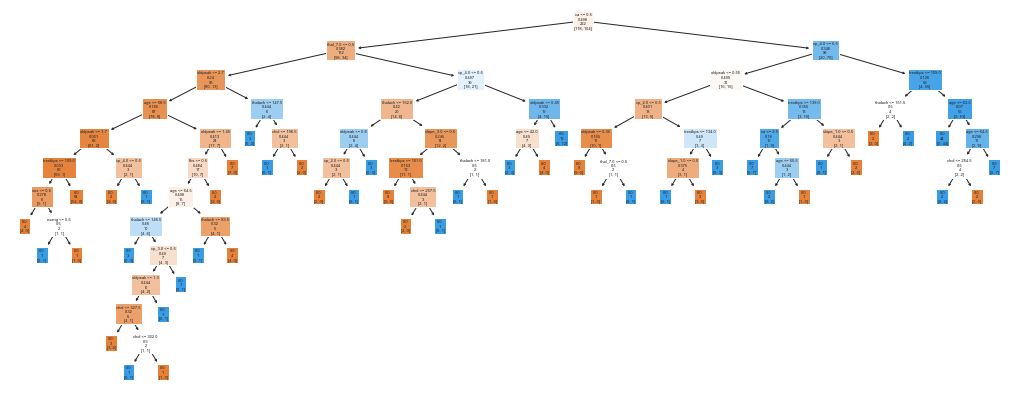

In [249]:
plt.figure(figsize = (18,7))
plot_tree(clt, feature_names = X.columns, label = ['Have HD', 'Doesnot have HD'], filled = True )

This is an example of **overfitting** the training data for which decision trees are prone to 

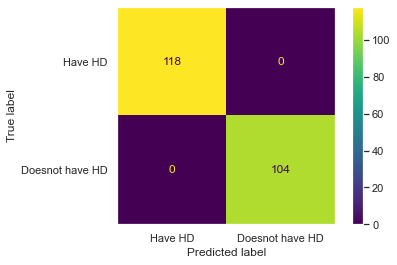

In [265]:
plot_confusion_matrix(clt, X_train, Y_train, display_labels = ['Have HD', 'Doesnot have HD'])
plt.grid(None)

The **Classification tree** is huge and we will now see how it performs on **testing dataset** by running the tree on confusion matrix

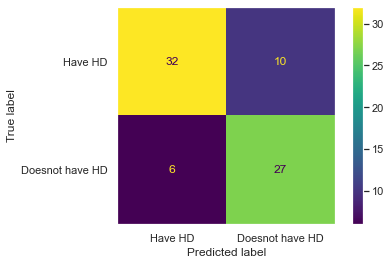

In [272]:
plot_confusion_matrix(clt, X_test, Y_test, display_labels = ['Have HD', 'Doesnot have HD'])
plt.grid(None)

Out of total **42** patients who has heart disease, it was able to identify **32 with an accuracy of 76%**..similarly out of **32** patients who did not have heart disease, it was able to identify **27 correct with an accuracy of 84%**..This might be due to overfitting that we can reduce by pruning 

### Cost Complexity Pruning part 1 : Visualise alpha

In [252]:
path = clt.cost_complexity_pruning_path(X_train, Y_train)
clt_alphas = path['ccp_alphas']
clt_alphas = clt_alphas[:-1] #exclusing the max value where only root would be left
print(clt_alphas)

[0.         0.00295295 0.0036036  0.003861   0.00405405 0.004095
 0.0041184  0.00429358 0.00541298 0.00578761 0.00600601 0.00600601
 0.00600601 0.00667591 0.00675676 0.00757375 0.00811505 0.00868726
 0.00889851 0.01038181 0.0105777  0.01422475 0.01604051 0.01642461
 0.02103075 0.03680006 0.03934523]


<Figure size 720x720 with 0 Axes>

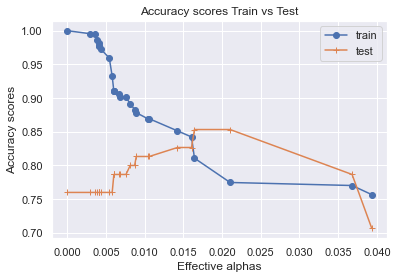

In [253]:
clt_dts = []

for clt_alpha in clt_alphas :
    clt_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = clt_alpha)
    clt_dt.fit(X_train, Y_train)
    clt_dts.append(clt_dt)
    
training_score = [clt_dt.score( X_train, Y_train) for clt_dt in clt_dts]
testing_score = [clt_dt.score( X_test, Y_test) for clt_dt in clt_dts]

plt.figure(figsize = (10,10))
fig, ax = plt.subplots()
ax.plot(clt_alphas,training_score, label = 'train', marker= 'o')
ax.plot(clt_alphas,testing_score, label = 'test', marker= '+')
ax.set_xlabel('Effective alphas')
ax.set_ylabel('Accuracy scores')
plt.legend()
ax.set_title('Accuracy scores Train vs Test')
plt.show()

We can see that the accuracy is highest when **ccp_alpha = 0.016** and after that accuracy of testing dataset drop. 

Note : Value of ccp_alpha iin **Classification tree** can range from 0 to 1 since Gini Impurity scores go from 0 to 1. In contrast, ccp_alpha in **Regression trees** can go from 0 to positive infinity since it depends on sum of sqaured residuals  

In [254]:
#Alternatively :

# train_pred_scores, test_pred_scores = [],[]

# for clt_alpha in clt_alphas :
#     clt_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = clt_alpha)
#     clt_dt.fit(X_train, Y_train)
#     X_pred_train = clt_dt.predict(X_train)
#     X_pred_test = clt_dt.predict(X_test)
#     train_pred_scores.append(accuracy_score(X_pred_train, Y_train))
#     test_pred_scores.append(accuracy_score(X_pred_test, Y_test))

# sns.set()
# plt.figure(figsize = (10,10))
# fig, ax = plt.subplots()
# ax.plot(clt_alphas,train_pred_scores, label = 'train' )
# ax.plot(clt_alphas,test_pred_scores, label = 'test')
# ax.set_xlabel('Effective alphas')
# ax.set_ylabel('Accuracy scores')
# plt.legend()
# ax.set_title('Accuracy scores Train vs Test')
# plt.show()

Since there are many ways to divide the orignal dataset into Training and testing, how do we know that we are using the best split? We also don't know if the value of alpha would still be best at 0.016 so we will need to use **ten-fold cross validation** to verify this 

### Cost Complexity Pruning part 2: Ten Fold Cross-Validation 

The graph that we drew suggested **ccp_alpha = 0.016** 

First, let's see the accuracy_score of ccp_alpha at this value using cross-val_score. We need to verify if this value is ideal when we split the training and testing dataset in different ways 

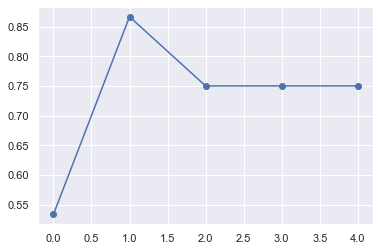

In [255]:
clf_dt = DecisionTreeClassifier(random_state =43, ccp_alpha = 0.016 )    

#we are using 5-fold cv instead of 10-fold due to small dataset
score = cross_val_score(clf_dt, X_train, Y_train, cv = 5)
df = pd.DataFrame(data = {'trees' : range(5), 'accuracy' : score})
plt.plot(df['trees'], df['accuracy'], marker = 'o')

The graph shows that ccp_alpha is sensitive to different training and testing dataset. With ccp_alpha = 0.016 we get accuracy between 0 and 0.85 so we need to find optimal value with cv 

<AxesSubplot:xlabel='alpha'>

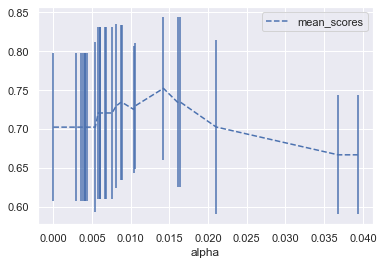

In [256]:
alpha_loop_values = []

for clt_alpha in clt_alphas :
    clt_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = clt_alpha)
    scores = cross_val_score(clt_dt, X_train, Y_train, cv = 5)
    alpha_loop_values.append([clt_alpha, np.mean(scores), np.std(scores)])

accuracy_scores = pd.DataFrame(alpha_loop_values, columns = ['alpha', 'mean_scores', 'std_scores'])

accuracy_scores.plot(x = 'alpha', y = 'mean_scores', yerr = 'std_scores', linestyle = '--')

Using cv, we can see that we should set ccp_alpha something close to 0.014 instead of 0.016, we should find exact value with :-

In [257]:
ideal_value = accuracy_scores.loc[(accuracy_scores['alpha']>0.013) & (accuracy_scores['alpha'] < 0.015 )]['alpha']

In [258]:
type(ideal_value)

pandas.core.series.Series

In [259]:
#changing to float so it can be used into final classification
ideal_value = float(ideal_value)
print(ideal_value)

0.014224751066856332


### Buidling Final Classification Tree

[Text(482.8846153846154, 237.82500000000002, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = Have HD'),
 Text(257.53846153846155, 169.875, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = Have HD'),
 Text(128.76923076923077, 101.92500000000001, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = Have HD'),
 Text(64.38461538461539, 33.974999999999994, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = Have HD'),
 Text(193.15384615384616, 33.974999999999994, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Doesnot have HD'),
 Text(386.3076923076923, 101.92500000000001, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Doesnot have HD'),
 Text(321.9230769230769, 33.974999999999994, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = Have HD'),
 Text(450.69230769230774, 33.974999999999994, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Doesnot have HD'),
 Text(708.2307692307693, 169.875, 'cp_4.

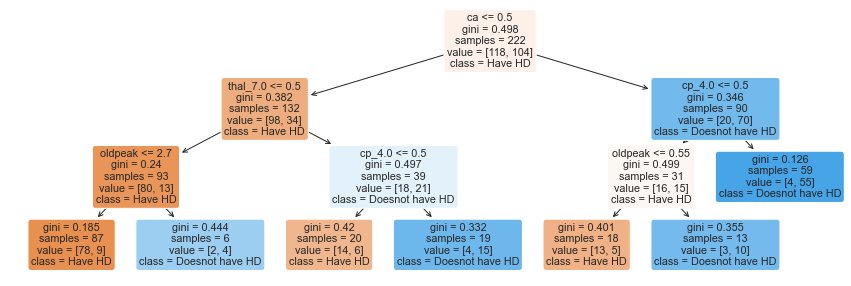

In [260]:
clt_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.0143)

clt_dt.fit(X_train, Y_train)

plt.figure(figsize = (15,5))
plot_tree(clt_dt, filled = True, rounded = True, class_names = ['Have HD', 'Doesnot have HD'], 
          feature_names = X_train.columns)

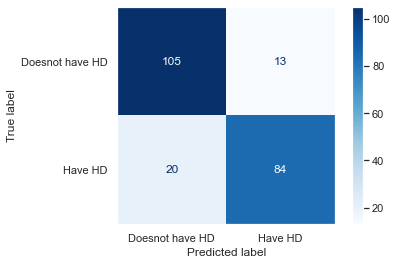

In [268]:
#checking for training data 

plot_confusion_matrix(clt_dt, X_train, Y_train, display_labels = ['Doesnot have HD', 'Have HD'], cmap=plt.cm.Blues)
plt.grid(None)

We can see increase in Bias since model is not overfitting on **training**, we can see some **False Positves** and **False Negatives** which will avoid overfitting and lead to Low variance in **testing** data 

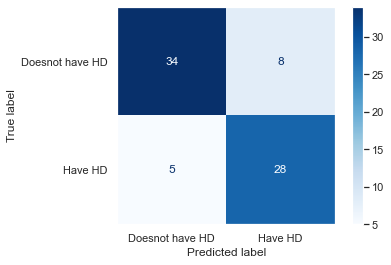

In [269]:
#checking for testing data
plot_confusion_matrix(clt_dt, X_test, Y_test, display_labels = ['Doesnot have HD', 'Have HD'], cmap=plt.cm.Blues)
plt.grid(None)

Out of 42, **34 (81%)** were correctly classified to not have heart disease and we can see there is an improvement in overall decision tree size as well which will reduce overfitting

***Thank you***